<a href="https://colab.research.google.com/github/004Saichaithanya/BayesianNetwork/blob/main/Bayes_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/sample_data/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df.drop_duplicates(inplace=True)

df.dropna(inplace=True)

df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [6]:
#Normalization- Min-Max
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
df[['age','trestbps','chol','thalach','oldpeak']]=scalar.fit_transform(df[['age','trestbps','chol','thalach','oldpeak']])

#Cleaned Data
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.433962,0.262557,0,1,0.396947,1,0.032258,1,0,3,0
299,0.333333,1,3,0.150943,0.315068,0,1,0.465649,0,0.193548,1,0,3,0
300,0.812500,1,0,0.471698,0.152968,1,1,0.534351,0,0.548387,1,2,3,0
301,0.583333,1,0,0.339623,0.011416,0,1,0.335878,1,0.193548,1,1,3,0


In [7]:
df.shape

(302, 14)

In [8]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12

In [15]:
import pgmpy
print(pgmpy.__version__)


1.0.0


In [28]:
# Discretize age into 5 bins
df['age_bin'] = pd.cut(df['age'], bins=5, labels=False)

In [29]:
from pgmpy.models import DiscreteBayesianNetwork

# Define Bayesian Network structure
#age → fbs → target → (chol, thalach)
model = DiscreteBayesianNetwork([
    ('age_bin', 'fbs'),
    ('fbs', 'target'),
    ('target', 'chol'),
    ('target', 'thalach')
])


In [30]:
from pgmpy.estimators import MaximumLikelihoodEstimator

model.fit(df, estimator=MaximumLikelihoodEstimator)

In [33]:
print(df['age_bin'].unique())


[3 0 1 2 4]


In [34]:
from pgmpy.inference import VariableElimination

# Set up inference engine
inference = VariableElimination(model)

# Example: Probability of heart disease when age = 0.6 (normalized)
prob_heart_disease = inference.query(variables=['target'], evidence={'age_bin':3})
print(prob_heart_disease)

# Example: Cholesterol distribution when target = 1 (has heart disease)
chol_dist = inference.query(variables=['chol'], evidence={'target': 1})
print(chol_dist)


+-----------+---------------+
| target    |   phi(target) |
+===========+===============+
| target(0) |        0.4577 |
+-----------+---------------+
| target(1) |        0.5423 |
+-----------+---------------+
+----------------------------+-------------+
| chol                       |   phi(chol) |
+============================+=============+
| chol(0.0)                  |      0.0061 |
+----------------------------+-------------+
| chol(0.011415525114155278) |      0.0000 |
+----------------------------+-------------+
| chol(0.034246575342465724) |      0.0061 |
+----------------------------+-------------+
| chol(0.052511415525114125) |      0.0061 |
+----------------------------+-------------+
| chol(0.07077625570776253)  |      0.0061 |
+----------------------------+-------------+
| chol(0.0776255707762557)   |      0.0061 |
+----------------------------+-------------+
| chol(0.0867579908675799)   |      0.0000 |
+----------------------------+-------------+
| chol(0.091324200913242)

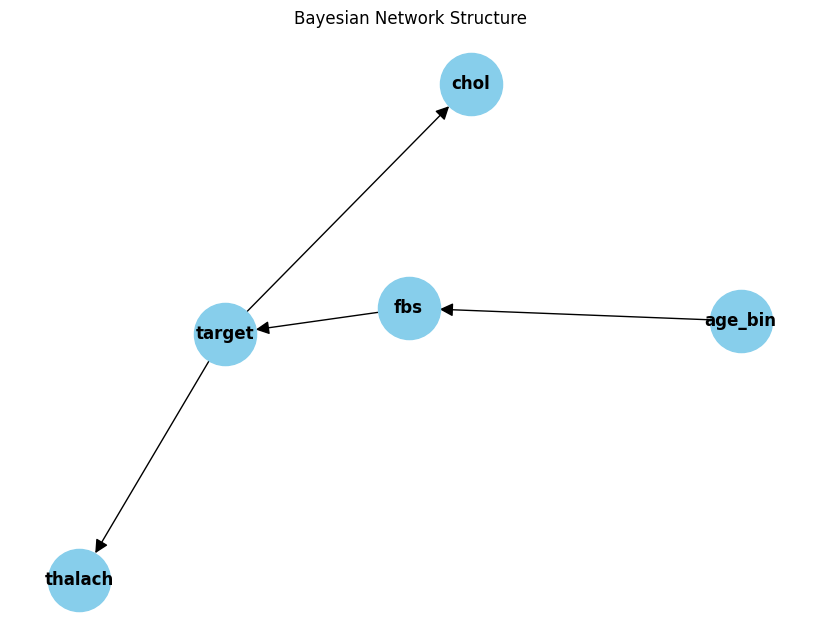

In [41]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
graph = nx.DiGraph()

# Add nodes and edges from the Bayesian Network model
graph.add_edges_from(model.edges())

# Draw the network structure
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(graph)  # Layout algorithm
nx.draw(graph, pos, with_labels=True, node_size=2000, node_color='skyblue',
        font_size=12, font_weight='bold', arrowsize=20)
plt.title('Bayesian Network Structure')
plt.show()


/tmp/ipython-input-39-454912013.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='target', y='probability', data=df_probs, palette='viridis')


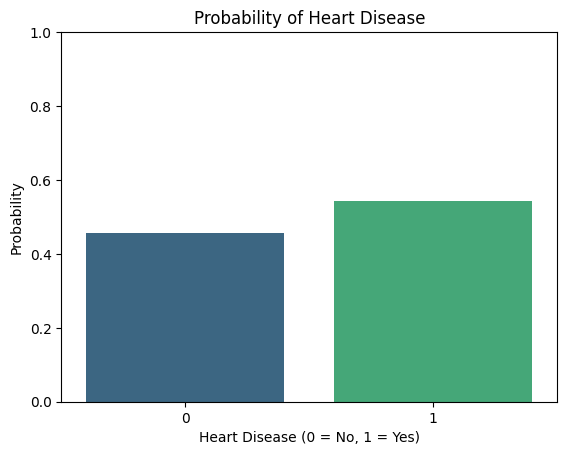

In [39]:
import seaborn as sns
import pandas as pd

# Data from your inference result (example values)
heart_disease_probs = {'target': [0, 1], 'probability': [0.4577, 0.5423]}

# Convert to DataFrame
df_probs = pd.DataFrame(heart_disease_probs)

# Plot
sns.barplot(x='target', y='probability', data=df_probs, palette='viridis')
plt.title('Probability of Heart Disease')
plt.ylabel('Probability')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylim(0, 1)
plt.show()


In [43]:
df.head()
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [44]:
df.to_csv('cleaned_heart_disease.csv', index=False)